## Part 1: Data Loading and Initial Exploration 

The data for this project is stored in the `data` folder in your repositories, in the `SOTU.csv` file. The data file is structured as a CSV with columns for president name, speech text, year, and word count in the speech. 

In this section you will:

1. Import the data into a pandas dataframe
2. Perform exploratory data analysis (EDA) including specifically:
- Analyze the number of speeches per president
- Analyze the number of speeches per year
- Analyze the word count distribution
- Analyze the word count distribution accross years using a rug plot
- Analyze the average word count per president
3. Write commentary on your findings

First, create the `conda` environment with the provided yaml file. Note, it's not unusual for it to take ~15 minutes for the environment to fully install.

## Read Data


In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
#conda install -c conda-forge spacy 
#python -m spacy download en_core_web_sm
plt.style.use('seaborn-v0_8-dark') 
sou = pd.read_csv("data/SOTU.csv")
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


#### Number of Speeches per President

/tmp/ipykernel_3786/1783353372.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sou.groupby('President')['Year']


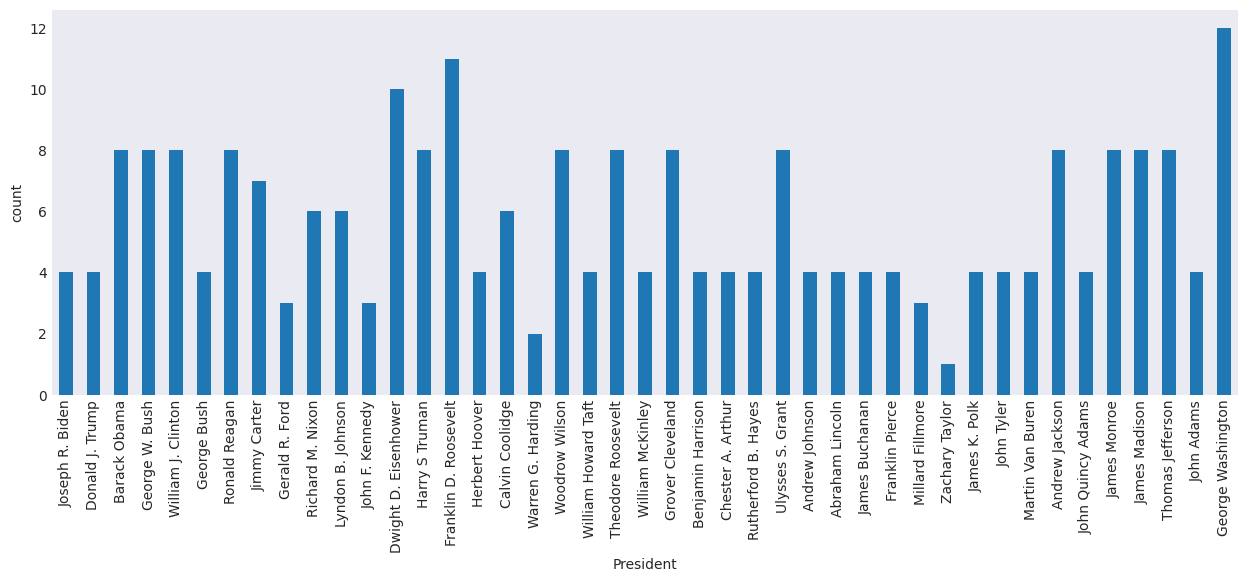

In [3]:
order = (
    sou.groupby('President')['Year']
    .max()
    .sort_values(ascending = False)
    .index
    .tolist()
)

tmpsou = sou
tmpsou['President'] = pd.Categorical(sou['President'], categories = order, ordered = True)

plt.figure(figsize = (15.3,5))
plt.ylabel("count")
tmpsou['President'].value_counts().loc[order].plot(kind = 'bar')

plt.savefig("outputs/president_counts.png", dpi=300)  
plt.show()

#### Number of Speeches per Year


In this section, I use spaCy to process the State of the Union speeches.

- **Token**: a single word-like unit from the text (for example, "running", "people").
- **Lemma**: the base form of a word (for example, "running" → "run", "better" → "good").
- **Stop word**: a very common word that usually does not add much meaning, like "the", "and", "of".
- **Punctuation**: symbols like ".", ",", "!", "?", etc.

For this analysis, I remove stop words and punctuation, and I work mostly with **lemmas**.  
Using lemmas helps to group different forms of the same word together (for example, "runs", "running", "ran" all become "run"), which makes the frequency counts and models less noisy.


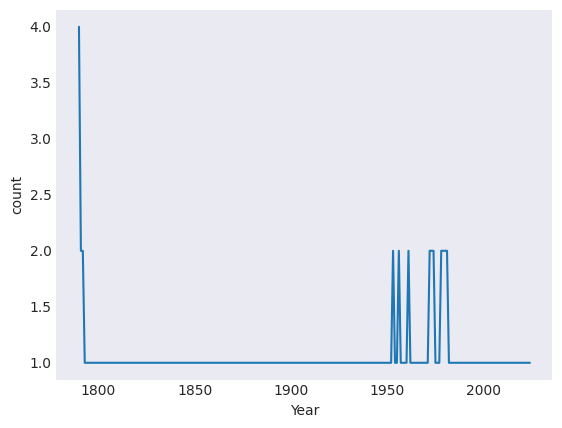

In [4]:
# Hint - Use value counts and sort by years
counts = sou.groupby('Year').size()
plt.ylabel("count")
counts.plot(kind = 'line')
plt.savefig("outputs/number_of_speeches_per_year.png", dpi=300)  
plt.show()


#### Word Count Distribution 

In [6]:
wordCounts = []
nlp = spacy.load('en_core_web_sm')
sou_subset = sou['Text']
for i in range(len(sou_subset)):
    count = 0
    tokens = nlp(sou_subset[i])
    for t in tokens:
        if t.is_punct == False and t.is_space == False:
            count += 1
    wordCounts.append(count)

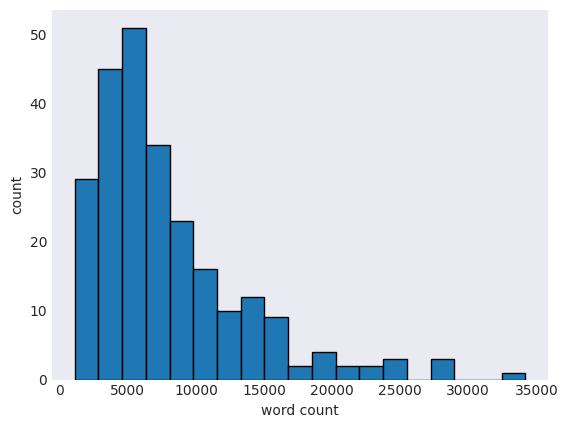

In [7]:
plt.hist(wordCounts, bins = 19,edgecolor='black')
plt.xlabel("word count")
plt.ylabel("count")
plt.savefig("outputs/word_counts.png", dpi=300)  
plt.show()

#### Word Count Distribution over Year

In [8]:
def count_tokens(text):
    count = 0
    tokens = nlp(text)
    for t in tokens:
        if t.is_punct == False and t.is_space == False:
            count += 1
    return count

sou['token_count'] = sou['Text'].apply(count_tokens)

year_Count = sou.groupby('Year')['token_count'].sum().reset_index()

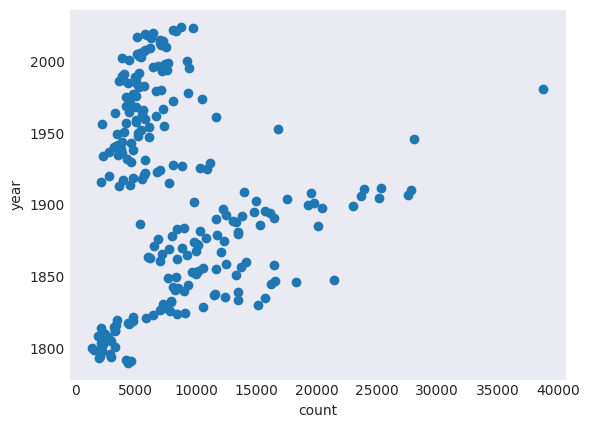

In [9]:
plt.ylabel("year")
plt.xlabel("count")
plt.scatter(year_Count['token_count'],year_Count['Year'])

plt.savefig("outputs/word_dist_per_year.png", dpi=300)  
plt.show()

#### Word Count Distribution per President

/tmp/ipykernel_3786/2341014039.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  president_Count = sou.groupby('President')['token_count'].sum().reset_index()


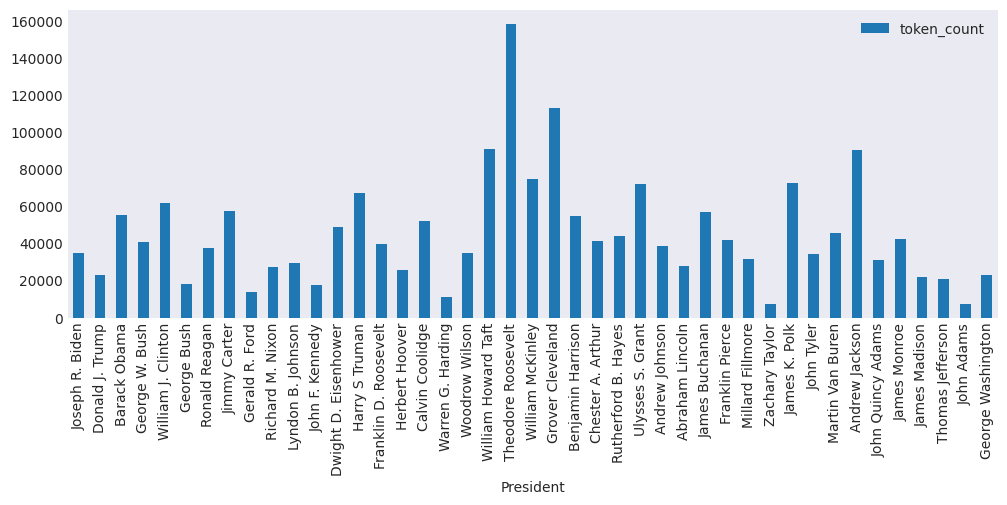

In [10]:
president_Count = sou.groupby('President')['token_count'].sum().reset_index()
president_Count.plot(
    kind='bar',
    x='President',
    y='token_count',
    figsize=(12,4)
)

plt.savefig("outputs/count_per_president.png", dpi=300)  
plt.show()